<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [79]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [80]:
#movies = pd.read_csv('./data/imdb_1000.csv')
Path = "./PRDataSets/" #. signifies home directory i.e. defalult working directory
FileName = "imdb_1000.csv"
print(Path + FileName)
movies =pd.read_csv(Path + FileName) #reads CSV file into a data frame
movies.head()

./PRDataSets/imdb_1000.csv


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [81]:
# Answer:
movies.shape #979 rows, 6 columns

(979, 6)

#### Check the data type of each column.

In [82]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [83]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [84]:
# Answer:
movies.sort_values(by="duration",ascending=True)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
742,7.6,Following,R,Mystery,69,"[u'Jeremy Theobald', u'Alex Haw', u'Lucy Russe..."
351,8.0,Frankenstein,UNRATED,Horror,70,"[u'Colin Clive', u'Mae Clarke', u'Boris Karloff']"
938,7.4,Alice in Wonderland,G,Animation,75,"[u'Kathryn Beaumont', u'Ed Wynn', u'Richard Ha..."
405,7.9,The Bride of Frankenstein,NOT RATED,Horror,75,"[u'Boris Karloff', u'Elsa Lanchester', u'Colin..."
303,8.0,The Nightmare Before Christmas,PG,Animation,76,"[u'Danny Elfman', u'Chris Sarandon', u""Catheri..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

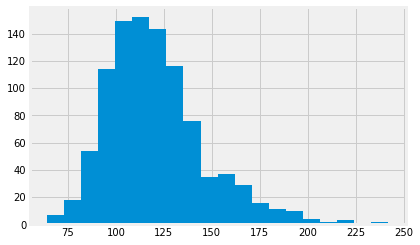

In [85]:
# Answer:
#plt.hist(movies,bins=20);
movies.duration.hist(bins=20);

#### Use a box plot to display that same data.

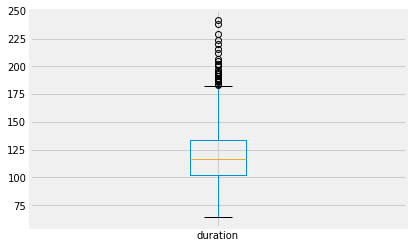

In [86]:
# Answer:
movies.boxplot("duration");

## Intermediate level

#### Count how many movies have each of the content ratings.

In [87]:
# Answer:
movies["content_rating"].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

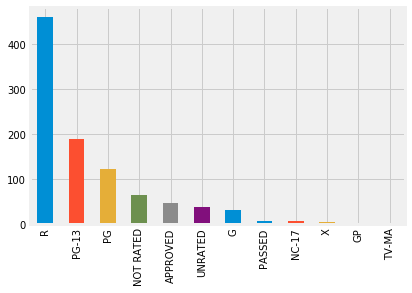

In [88]:
# Answer:
movies.content_rating.value_counts().plot(kind='bar')


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [89]:
# Answer:
NewRating = movies.content_rating

for OldRating in ['NOT RATED', 'APPROVED', 'PASSED', 'GP']:
    NewRating=NewRating.replace(OldRating,"UNRATED")

print(NewRating)

0            R
1            R
2            R
3        PG-13
4            R
5      UNRATED
6      UNRATED
7        PG-13
8            R
9            R
10       PG-13
11       PG-13
12          PG
13       PG-13
14       PG-13
15       PG-13
16           R
17     UNRATED
18           R
19          PG
20           R
21           R
22     UNRATED
23           R
24           R
25       PG-13
26       PG-13
27           R
28           R
29     UNRATED
        ...   
949         PG
950          R
951          R
952          R
953         PG
954      PG-13
955          R
956         PG
957          R
958      PG-13
959          R
960      PG-13
961          R
962         PG
963          R
964      PG-13
965      PG-13
966      PG-13
967          R
968          R
969          R
970          R
971          R
972      NC-17
973      PG-13
974         PG
975         PG
976      PG-13
977         PG
978          R
Name: content_rating, Length: 979, dtype: object


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [90]:
# Answer:
NewRating = movies.content_rating

for OldRating in ['X', 'TV-MA']:
    NewRating=NewRating.replace(OldRating,"NC-17")

print(NewRating)

0              R
1              R
2              R
3          PG-13
4              R
5      NOT RATED
6      NOT RATED
7          PG-13
8              R
9              R
10         PG-13
11         PG-13
12            PG
13         PG-13
14         PG-13
15         PG-13
16             R
17       UNRATED
18             R
19            PG
20             R
21             R
22      APPROVED
23             R
24             R
25         PG-13
26         PG-13
27             R
28             R
29        PASSED
         ...    
949           PG
950            R
951            R
952            R
953           PG
954        PG-13
955            R
956           PG
957            R
958        PG-13
959            R
960        PG-13
961            R
962           PG
963            R
964        PG-13
965        PG-13
966        PG-13
967            R
968            R
969            R
970            R
971            R
972        NC-17
973        PG-13
974           PG
975           PG
976        PG-

#### Count the number of missing values in each column.

In [91]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [92]:
# Answer:
NullBool=movies[movies.isnull().any(axis=1)]
NullBool

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [93]:
# Answer:
LongMovies = movies[movies['duration'] > 120]
LongMovies['star_rating'].mean()

7.953669724770622

#### Use a visualization to detect whether there is a relationship between duration and star rating.

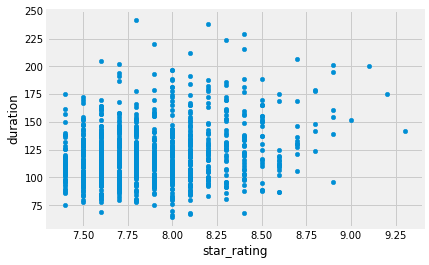

In [94]:
# Answer:
movies.plot(kind='scatter', x='star_rating', y='duration')

#### Calculate the average duration for each genre.

In [95]:
# Answer:
movies.groupby("genre").mean().drop('star_rating',axis=1)
#movies.groupby("genre").mean().drop('star_rating',axis=1).plot(kind='barh');

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

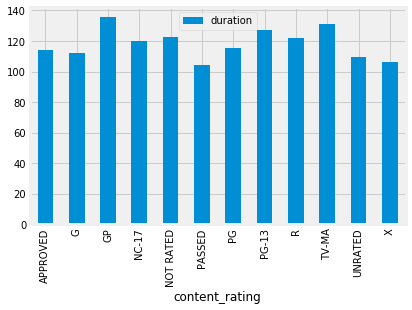

In [96]:
# Answer:
#movies.content_rating.value_counts().plot(kind='hist')
movies.groupby('content_rating').mean().drop('star_rating',axis=1).plot(kind='bar')
#movies.scatter()

#### Determine the top rated movie (by star rating) for each genre.

In [97]:
# Answer:
movies.groupby('genre').star_rating.max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [98]:
# Answer:
movies[movies.title.duplicated(keep=False)==True]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [120]:
# Answer:
#df[df['A'].isin([3, 6])]
CommonMovieGenres=pd.DataFrame(movies.genre.value_counts()>10,) #create a boolean dataframe - True if genre contains more than 10 films
#print(CommonMovieGenres)
CommonMovieGenres=CommonMovieGenres[CommonMovieGenres.genre] #remove false values
CheckList = list(CommonMovieGenres.index) #pass all remaining genres into list
#print(CheckList)
NewMovies = movies[movies['genre'].isin(CheckList)] #filter all non common genres using list
#print(NewMovies)
NewMovies.groupby('genre').max() #find max by genre

,star_rating,title,duration,actors_list
genre,,,,
Action,9.0,Yojimbo,205,"[u'Ziyi Zhang', u'Takeshi Kaneshiro', u'Andy L..."
Adventure,8.9,True Grit,224,"[u'Yves Montand', u'Charles Vanel', u'Peter va..."
Animation,8.6,Wreck-It Ralph,134,"[u'Y\xf4ji Matsuda', u'Yuriko Ishida', u'Y\xfb..."
Biography,8.9,Walk the Line,202,"[u'Will Smith', u'Thandie Newton', u'Jaden Smi..."
Comedy,8.6,Zombieland,187,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
Crime,9.3,Zodiac,229,"[u'Yeong-ae Lee', u'Min-sik Choi', u'Shi-hoo K..."
Drama,8.9,Zulu,242,"[u'William Holden', u'Gloria Swanson', u'Erich..."
Horror,8.6,[Rec],146,"[u'Simone Signoret', u'V\xe9ra Clouzot', u'Pau..."
Mystery,8.6,Vertigo,160,"[u'Rufus Sewell', u'Kiefer Sutherland', u'Jenn..."


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!